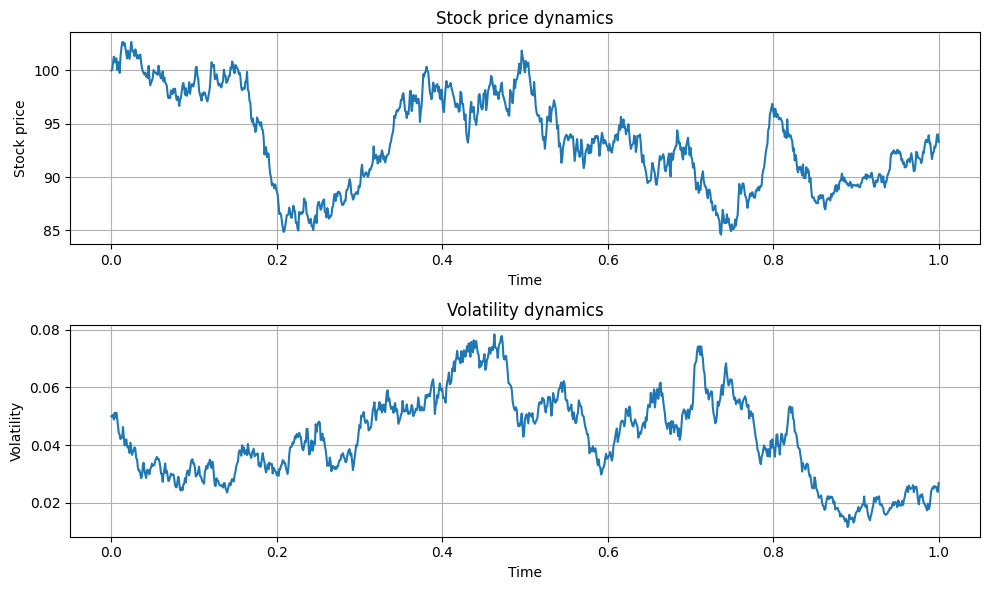

European call option price: 27.63


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

T = 1
N = 1000
K = 100
S_0 = 100
r = 0.05
dt = T / N
t = np.linspace(0.0, T, N+1)
mu = 0.1
sigma_0 = 0.05
kappa = 2
theta = 0.05
sigma = 0.3
rho = -0.5 

dW1 = np.random.randn(N) * np.sqrt(dt)
dW2 = np.random.randn(N) * np.sqrt(dt)

S = np.zeros(N+1)
v = np.zeros(N+1)
S[0] = 100
v[0] = sigma_0

# Euler-Maruyama method
for i in range(1, N+1):
    v[i] = v[i-1] + kappa * (theta - v[i-1]) * dt + sigma * np.sqrt(v[i-1]) * dW2[i-1]
    S[i] = S[i-1] * (1 + mu * dt + np.sqrt(v[i-1]) * dW1[i-1])


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, S)
plt.title('Stock price dynamics')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.title('Volatility dynamics')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

def heston_characteristic(u, S_0, K, r, T, kappa, theta, sigma, rho, sigma_0):
   xi = kappa - rho * sigma * 1j * u
   d = np.sqrt((rho * sigma * 1j * u - xi)**2 - sigma**2 * (-u * 1j - u**2))
   g = (xi - rho * sigma * 1j * u - d) / (xi - rho * sigma * 1j * u + d)
   C = r * 1j * u * T + (kappa * theta) / sigma**2 * ((xi - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
   D = (xi - rho * sigma * 1j * u - d) / sigma**2 * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
   return np.exp(C + D * sigma_0 + 1j * u * np.log(S_0))

def heston_call_price(S_0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic(u - 1j, S_0, K, r, T, kappa, theta, sigma, rho, sigma_0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) * 0.5 * S_0 - np.exp(-r * T) / np.pi * integral

call_price = heston_call_price(S_0, K, r, T, kappa, theta, sigma, rho, sigma_0)

print("European call option price:", np.round(call_price, 2))